<a href="https://colab.research.google.com/github/Rujul-Patel/Data-Science-and-ML/blob/master/Deep-Learning/MNIST_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN to classify handwritten digits 
----

### Importing Tensorflow and MNIST Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#Other Libraries
import numpy as np

#Plot Paramenters
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)

##### Importing MNIST Dataset

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Dataset size
print("Training Data Shape \t: X : ",X_train.shape, " y : ",y_train.shape)
print("Test Data Shape \t: X : ",X_test.shape, " y : ",y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
Training Data Shape 	: X :  (60000, 28, 28)  y :  (60000,)
Test Data Shape 	: X :  (10000, 28, 28)  y :  (10000,)


Thus, we have total of 70,000 28X28 pixels images, of which 60,000 are in training set and rest 10,000 in test data set

### Preview Few Random Images
-------


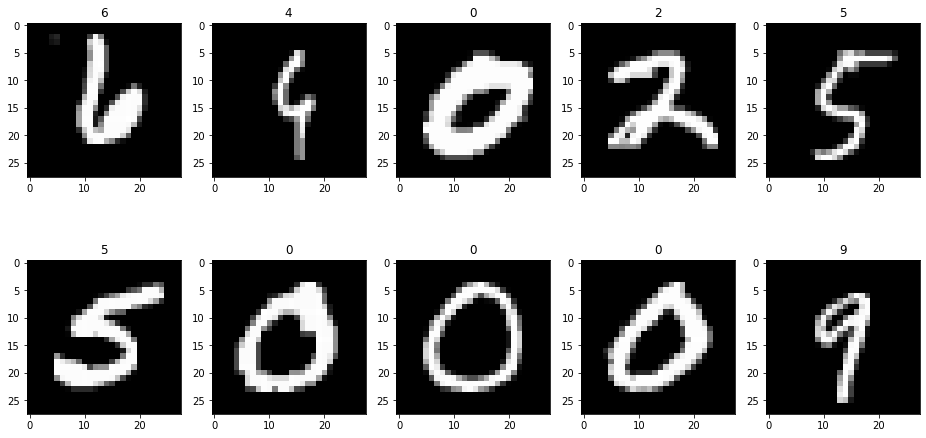

In [4]:
rand_arr = np.random.randint(low=1,high=len(X_train),size=(10,))
for i in range(0,len(rand_arr)):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[rand_arr[i]],cmap=plt.get_cmap('gray'))
  plt.title(y_train[rand_arr[i]])

#### Preprocess Data

In [5]:
#One-hot encode the y variable
y_train  = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

#Normalizing
X_train = X_train/255.0
X_test = X_test/255.0

# Creating a Shallow Neural Network Model

In [8]:
#Defining a Shallow Model with 1 hidden layer

model_shallow = tf.keras.models.Sequential()
model_shallow.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model_shallow.add(tf.keras.layers.Dense(128,activation='sigmoid'))
model_shallow.add(tf.keras.layers.Dense(10,activation='softmax'))

In [9]:
#Compiling the model
model_shallow.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

#Train the model
%time model_shallow.fit(X_train,y_train,epochs=60,batch_size=10)

Epoch 1/60
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8529 - accuracy: 0.8049
Epoch 2/60
6000/6000 [==============================] - 11s 2ms/step - loss: 0.4009 - accuracy: 0.8920
Epoch 3/60
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3395 - accuracy: 0.9039
Epoch 4/60
6000/6000 [==============================] - 11s 2ms/step - loss: 0.3108 - accuracy: 0.9112
Epoch 5/60
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2914 - accuracy: 0.9168
Epoch 6/60
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2765 - accuracy: 0.9207
Epoch 7/60
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2638 - accuracy: 0.9245
Epoch 8/60
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2524 - accuracy: 0.9275
Epoch 9/60
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2421 - accuracy: 0.9303
Epoch 10/60
6000/6000 [==============================] - 11s 2ms/step - l

In [12]:
score, acc = model_shallow.evaluate(X_test,y_test)
print('Test Score: ',score)
print('Train Accuracy:', round((acc*100),2)," %")

313/313 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9727
Test Score:  0.0899033322930336
Train Accuracy: 97.27  %
